Notebook for creating the arrays indicating the coast limit and the land limit

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
%matplotlib notebook

> Import an array with the landmask. `1 = land` and `0 = ocean`

In [6]:
landmask = np.load('../landmask.npy')

<IPython.core.display.Javascript object>


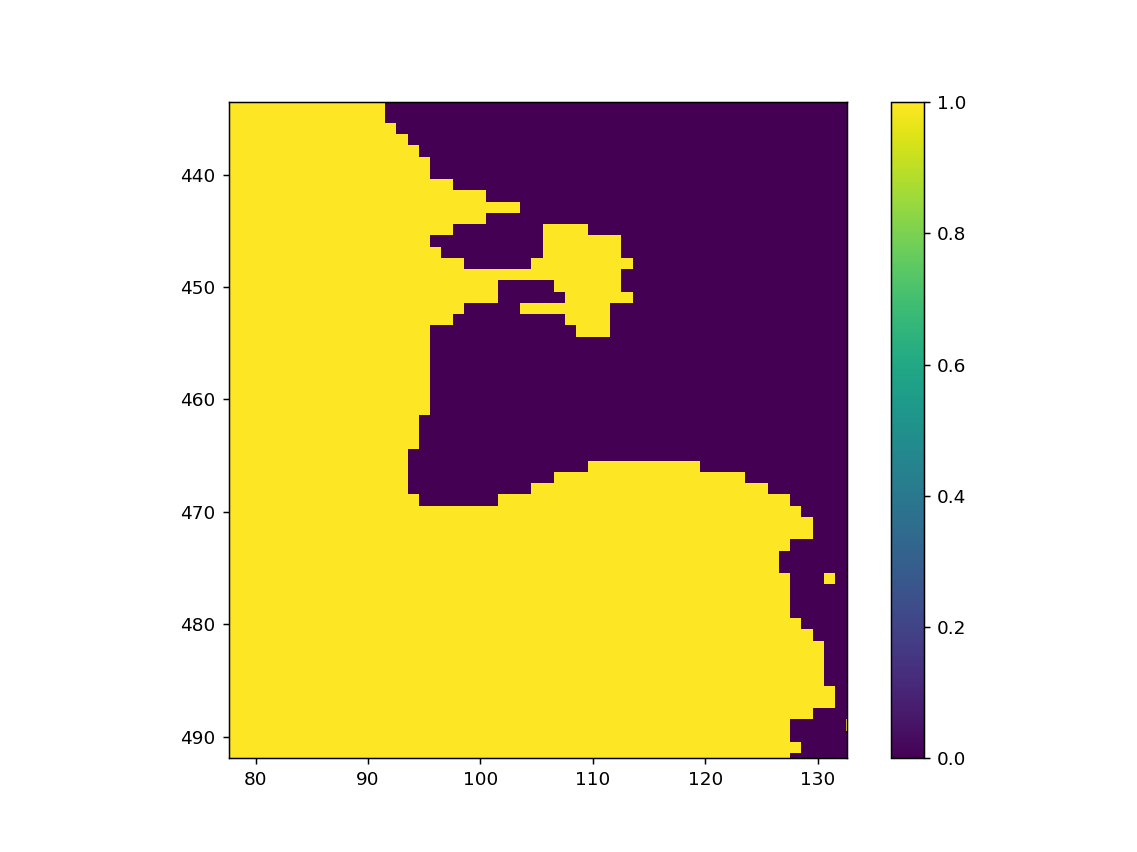

In [7]:
plt.figure()
plt.imshow(landmask)
plt.colorbar()

## Edge detection

In [8]:
mask_lap = np.roll(landmask, -1, axis=0) + np.roll(landmask, 1, axis=0)
mask_lap += np.roll(landmask, -1, axis=1) + np.roll(landmask, 1, axis=1)
mask_lap -= 4*landmask

coastal = ma.masked_array(landmask, mask_lap>0)  # ocean cell next to land.
shore = ma.masked_array(landmask, mask_lap<0)  # land cell next to ocean.
coastal = coastal.mask.astype('int')
shore = shore.mask.astype('int')

<IPython.core.display.Javascript object>


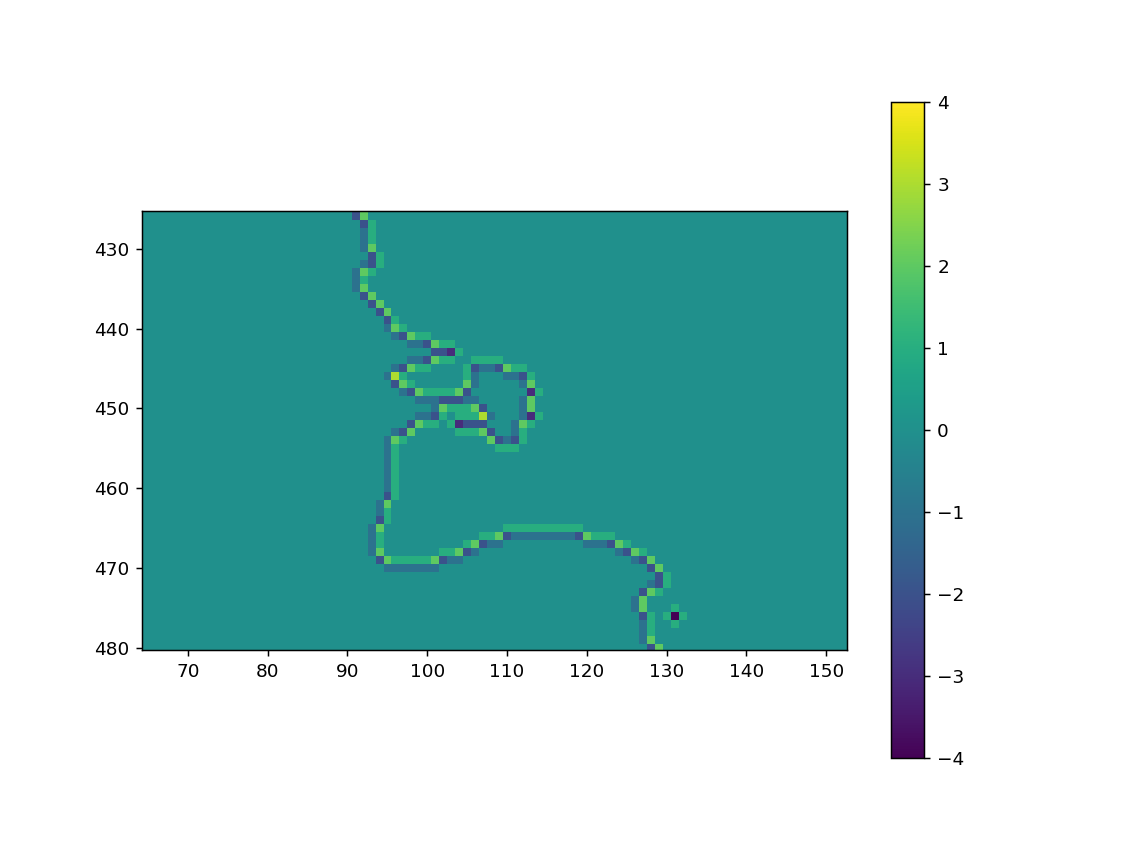

In [10]:
plt.figure()
plt.imshow(mask_lap)
plt.colorbar()

<IPython.core.display.Javascript object>


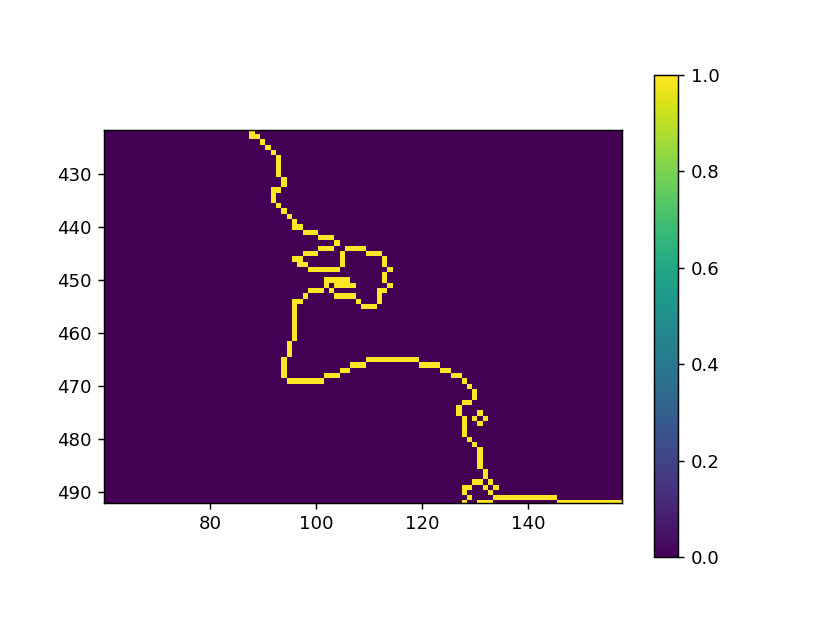

In [198]:
plt.figure()
plt.imshow(coastal)
plt.colorbar()

<IPython.core.display.Javascript object>


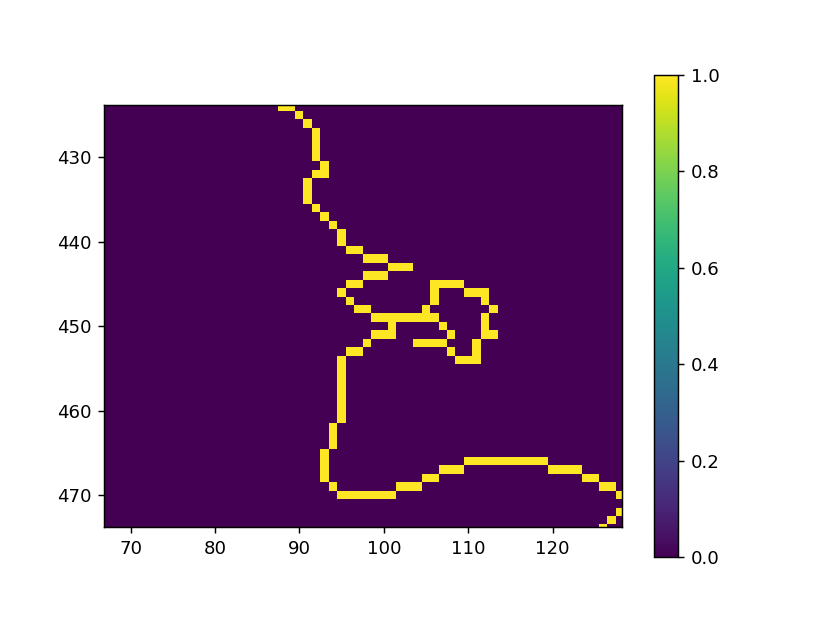

In [199]:
plt.figure()
plt.imshow(shore)
plt.colorbar()

<IPython.core.display.Javascript object>


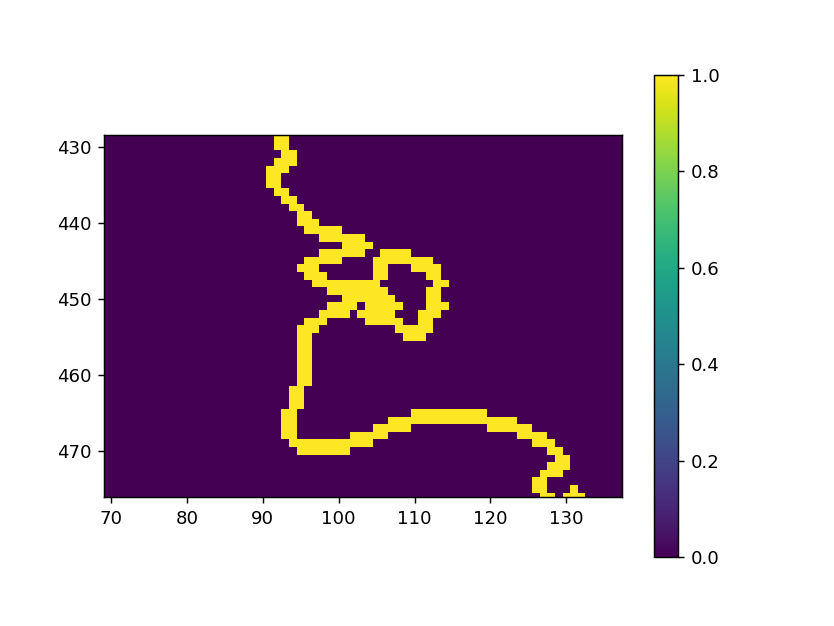

In [200]:
plt.figure()
plt.imshow(shore + coastal)
plt.colorbar()

> obs: the arrays don't ovelap!

Thees is a spellling mistaque on porpoise 

# Asigning coastal velocities

In [130]:
Ly = np.roll(landmask, -1, axis=0) - np.roll(landmask, 1, axis=0)
Lx = np.roll(landmask, -1, axis=1) - np.roll(landmask, 1, axis=1)

v_x = np.ma.masked_where(coastal==0, -Lx)
v_y = np.ma.masked_where(coastal==0, -Ly)

magnitude = np.sqrt(v_y**2 + v_x**2)
# the coastal cells between land create a problem. Magnitude there is zero
# I force it to be one to avoid problems when normalizing.
ny, nx = np.where(magnitude==0)
magnitude[ny,nx] = 1

v_x = v_x/magnitude
v_y = v_y/magnitude
v_x.set_fill_value(value=0) # setting fill value to zero.
v_y.set_fill_value(value=0)
# store v_x.data and v_y.data

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [131]:
v_x.set_fill_value(value=0)

> The plots are upside-down because I use imshow

<IPython.core.display.Javascript object>


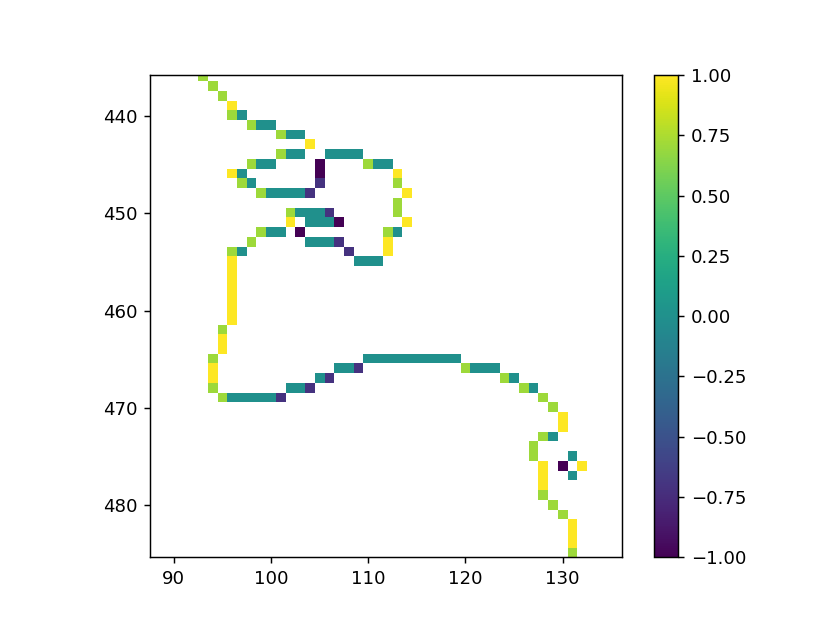

In [132]:
plt.figure()
plt.imshow(v_x)
plt.colorbar()

<IPython.core.display.Javascript object>


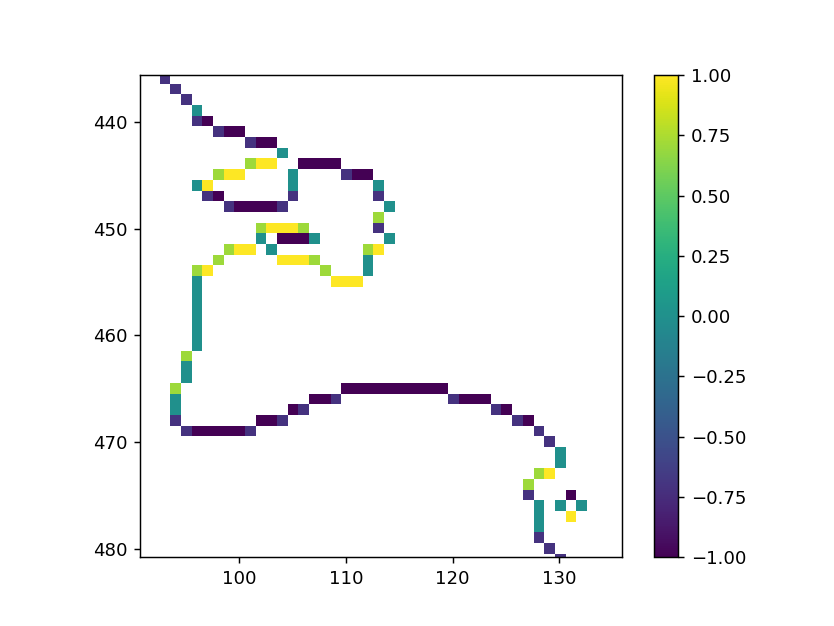

In [133]:
plt.figure()
plt.imshow(v_y)
plt.colorbar()